In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Evaluation Projects\Flight_Ticket_Participant_Datasets\Data_Train.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## We have to remove the null values.

In [6]:
df['Route']=df['Route'].replace('',np.nan)

In [7]:
from statistics import mode
df['Route']=df['Route'].fillna(mode(df["Route"]))

In [8]:
df['Total_Stops']=df['Total_Stops'].replace('',np.nan)

In [9]:
df['Total_Stops']=df['Total_Stops'].fillna(mode(df["Total_Stops"]))

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## we have to check data  type

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Encoding the data as there are object data types.

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,4.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,4.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,4.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,4.0,8.0,12648


## visualization of data

4.0     3849
3.0     2053
1.0     1752
6.0     1196
8.0      818
10.0     479
0.0      319
2.0      194
7.0       13
5.0        6
11.0       3
9.0        1
Name: Airline, dtype: int64


<Figure size 800x1600 with 0 Axes>

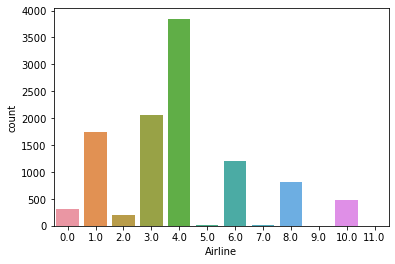

<Figure size 800x1600 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt  

ax=sns.countplot(x="Airline",data=df)
print(df["Airline"].value_counts())
plt.figure(figsize=(5,10),dpi=160)


2.0    4537
3.0    2871
0.0    2197
4.0     697
1.0     381
Name: Source, dtype: int64


<Figure size 800x1600 with 0 Axes>

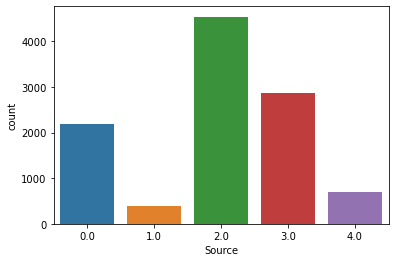

<Figure size 800x1600 with 0 Axes>

In [17]:
ax=sns.countplot(x="Source",data=df)
print(df["Source"].value_counts())
plt.figure(figsize=(5,10),dpi=160)

1.0    4537
0.0    2871
2.0    1265
5.0     932
3.0     697
4.0     381
Name: Destination, dtype: int64


<Figure size 800x1600 with 0 Axes>

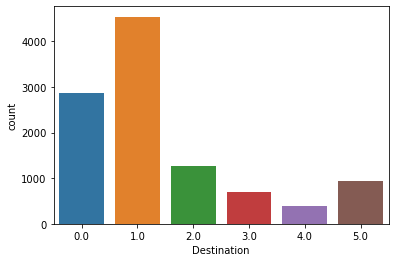

<Figure size 800x1600 with 0 Axes>

In [18]:
ax=sns.countplot(x="Destination",data=df)
print(df["Destination"].value_counts())
plt.figure(figsize=(5,10),dpi=160)

0.0    5626
4.0    3491
1.0    1520
2.0      45
3.0       1
Name: Total_Stops, dtype: int64


<Figure size 4000x1600 with 0 Axes>

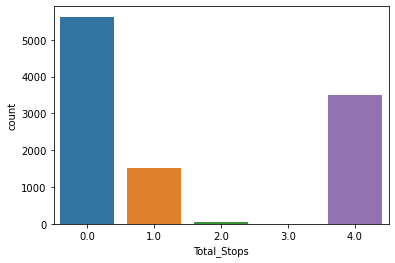

<Figure size 4000x1600 with 0 Axes>

In [23]:
ax=sns.countplot(x="Total_Stops",data=df)
print(df["Total_Stops"].value_counts())
plt.figure(figsize=(25,10),dpi=160)

8.0    8345
5.0    1982
7.0     320
0.0      19
4.0       7
3.0       4
6.0       3
9.0       1
1.0       1
2.0       1
Name: Additional_Info, dtype: int64


<Figure size 4000x1600 with 0 Axes>

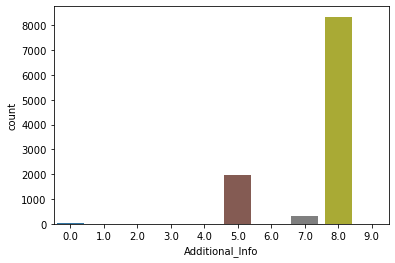

<Figure size 4000x1600 with 0 Axes>

In [24]:
ax=sns.countplot(x="Additional_Info",data=df)
print(df["Additional_Info"].value_counts())
plt.figure(figsize=(25,10),dpi=160)

## we need find the correlation to best the result 

In [27]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


In [28]:
df.corr()['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

### We see that the factors positively related to Price are Route, Arrival time and Duration,Total_stops are negatively correlated

### Finding the correlation by ploting 

<AxesSubplot:>

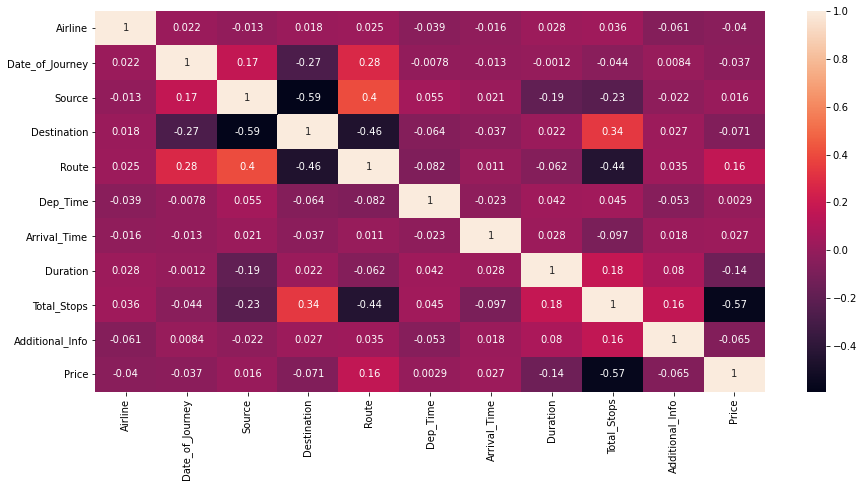

In [29]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

### Seperating data into independent and dependent variables thus dropping Price 

In [30]:
x=df.drop("Price",axis=1)
y=df["Price"]

## Checking for skewness

In [31]:
x.skew().sort_values(ascending=False)

Destination        1.244169
Airline            0.731095
Total_Stops        0.631681
Dep_Time           0.195055
Date_of_Journey   -0.070888
Duration          -0.213427
Source            -0.424054
Route             -0.502066
Arrival_Time      -0.606530
Additional_Info   -1.779838
dtype: float64

### Removing the skewness

In [32]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [33]:
type(x_new)

numpy.ndarray

In [34]:
x=pd.DataFrame(x_new,columns=x.columns)

In [35]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,-0.295500,0.072832,-1.599712,1.752703,-1.533562,1.502382,-1.795820,0.459866,1.293592,0.524703
1,-1.420300,-1.481524,0.902061,-1.370545,0.230509,-1.354219,0.041953,1.239775,0.355606,0.524703
2,0.147745,1.484889,-0.012108,0.005861,1.199732,-0.511664,-1.384191,-0.746555,0.355606,0.524703
3,-0.295500,-1.102101,0.902061,-1.370545,0.427672,0.922643,1.488045,1.041361,-0.905745,0.524703
4,-0.295500,-2.157252,-1.599712,1.752703,-1.256707,0.723331,1.172462,0.977229,-0.905745,0.524703
...,...,...,...,...,...,...,...,...,...,...
10678,-2.244150,1.342497,0.902061,-1.370545,-0.324630,1.164448,1.251587,0.426193,1.293592,0.524703
10679,-1.420300,0.459145,0.902061,-1.370545,-0.324630,1.287476,1.418517,0.434621,1.293592,0.524703
10680,0.147745,0.459145,-1.599712,0.707053,-1.533562,-0.743351,-0.219047,0.790997,1.293592,0.524703
10681,2.122896,-2.157252,-1.599712,1.752703,-1.533562,-0.126159,0.146002,0.443043,1.293592,0.524703


In [36]:
x.skew().sort_values(ascending=False)

Total_Stops        0.325203
Destination        0.041560
Airline           -0.015312
Dep_Time          -0.150760
Date_of_Journey   -0.228762
Source            -0.238259
Arrival_Time      -0.381592
Duration          -0.390688
Route             -0.442983
Additional_Info   -1.372067
dtype: float64

In [37]:
sk=x.skew()

In [38]:
sk[np.abs(sk)>0.25].all()

True

## Checking for outliers and for that the data to be in range in -3 to +3

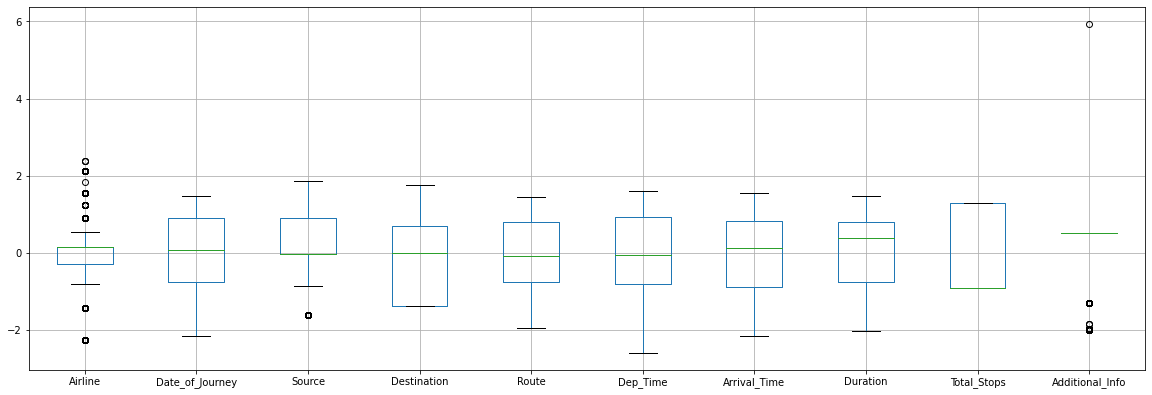

In [39]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [40]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [41]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,-0.295500,0.072832,-1.599712,1.752703,-1.533562,1.502382,-1.795820,0.459866,1.293592,0.524703
1,-1.420300,-1.481524,0.902061,-1.370545,0.230509,-1.354219,0.041953,1.239775,0.355606,0.524703
2,0.147745,1.484889,-0.012108,0.005861,1.199732,-0.511664,-1.384191,-0.746555,0.355606,0.524703
3,-0.295500,-1.102101,0.902061,-1.370545,0.427672,0.922643,1.488045,1.041361,-0.905745,0.524703
4,-0.295500,-2.157252,-1.599712,1.752703,-1.256707,0.723331,1.172462,0.977229,-0.905745,0.524703
...,...,...,...,...,...,...,...,...,...,...
10678,-2.244150,1.342497,0.902061,-1.370545,-0.324630,1.164448,1.251587,0.426193,1.293592,0.524703
10679,-1.420300,0.459145,0.902061,-1.370545,-0.324630,1.287476,1.418517,0.434621,1.293592,0.524703
10680,0.147745,0.459145,-1.599712,0.707053,-1.533562,-0.743351,-0.219047,0.790997,1.293592,0.524703
10681,2.122896,-2.157252,-1.599712,1.752703,-1.533562,-0.126159,0.146002,0.443043,1.293592,0.524703


In [42]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

## Preparing the machine learning model 

In [43]:
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score

In [44]:
for i in range (0,500) :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}") 
    print("\n")

at random state 0,the training accuracy is :0.2630464623964264
at random state 0,the testing accuracy is :0.2513816887523991


at random state 1,the training accuracy is :0.264546560931896
at random state 1,the testing accuracy is :0.2464495565660101


at random state 2,the training accuracy is :0.2578662197800895
at random state 2,the testing accuracy is :0.27353270723547285


at random state 3,the training accuracy is :0.26358640356167007
at random state 3,the testing accuracy is :0.24903988755356543


at random state 4,the training accuracy is :0.25726039832712544
at random state 4,the testing accuracy is :0.2752807703489497


at random state 5,the training accuracy is :0.26127950523642374
at random state 5,the testing accuracy is :0.2593626229039798


at random state 6,the training accuracy is :0.26254710666112135
at random state 6,the testing accuracy is :0.253781370425305


at random state 7,the training accuracy is :0.26086386506049564
at random state 7,the testing accuracy is :

### At random state 88, the testing and training accuracy is closest to 26.09%

In [45]:
xtrain,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
pred_test=lr.predict(x_test)

In [48]:
print(r2_score(y_test,pred_test))

0.26095823658244965


In [49]:
pred_test.shape

(2137,)

In [50]:
y_test.shape

(2137,)

## CROSS VALIDATION

In [51]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.25892115267728893 and accuracy score for training is -0.25553367796075843and accuracy score for testing is 0.26095823658244965


At cross fold 3 the cv score is 0.25884410475194264 and accuracy score for training is -0.25553367796075843and accuracy score for testing is 0.26095823658244965


At cross fold 4 the cv score is 0.25898990603966054 and accuracy score for training is -0.25553367796075843and accuracy score for testing is 0.26095823658244965


At cross fold 5 the cv score is 0.2589937757677926 and accuracy score for training is -0.25553367796075843and accuracy score for testing is 0.26095823658244965


At cross fold 6 the cv score is 0.2587678531237491 and accuracy score for training is -0.25553367796075843and accuracy score for testing is 0.26095823658244965


At cross fold 7 the cv score is 0.25901558321000534 and accuracy score for training is -0.25553367796075843and accuracy score for testing is 0.26095823658244965


At cross fold 8 the cv s

### At cv=5, the accuracy is maximum and testing accuracy is 26.09% and training accuracy is 25.89%

## Plot the Data

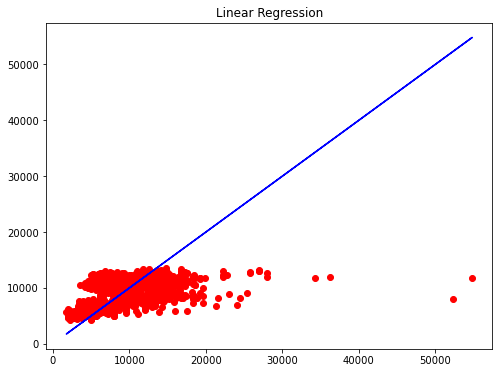

In [52]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

### We see that the data is clustered at one particluar area and is not uniformly distributed at the linear line

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [54]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [55]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.2609582382631429

In [56]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.2589937769279243

## Thus we get the model accuracy is 26.09% and Cross validation score as 25.89%,thus the model is now trained. The difference is less thus no overfitting. But the model accuracy is too less, we need to check for hyper parameter testing.

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [58]:
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [59]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 88.03509179762617
Cross Val Score: 86.0823164760314


### Here we see that the model accuracy is increased to 88.03% and the cross validation score is 86% which is very good and there is no overfitting also

In [60]:
import pickle

In [61]:
filename='Flight_Price.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [62]:
loaded_model= pickle.load(open('Flight_Price.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8803509179762616


In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
predicted,3854.32,13146.99,12029.708167,5623.784167,10383.8,7422.45,8296.498333,10938.53,5717.08,4603.72,...,10863.14,12973.0375,4808.23,13674.79,7571.47,14350.65,6499.59,13667.74,11733.28,12132.13
original,3854.32,13146.99,12029.708167,5623.784167,10383.8,7422.45,8296.498333,10938.53,5717.08,4603.72,...,10863.14,12973.0375,4808.23,13674.79,7571.47,14350.65,6499.59,13667.74,11733.28,12132.13


### Testing the trained model for the Data_test given in the question to predict the price

In [64]:
x_test=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Evaluation Projects\Flight_Ticket_Participant_Datasets\Test_set.csv")

In [65]:
x_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [66]:
for i in x_test.columns:
    if x_test[i].dtypes=="object":
        x_test[i]=enc.fit_transform(x_test[i].values.reshape(-1,1))

In [67]:
x_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0


In [68]:
model_test=pd.DataFrame(loaded_model.predict(x_test))
model_test

,0
0,8003.60
1,8003.60
2,8003.60
3,8003.60
4,8581.70
...,...
2666,20906.38
2667,6898.92
2668,8003.60
2669,20906.38


### Saving the values of predicted Flight Prices in csv

In [69]:
result = pd.DataFrame()
target_var=loaded_model.predict(x_test)

result["Price"] = target_var
result = result.sort_index()
result.to_csv('Predicted_Flight_Price.csv',index = False)